NOME: Gabriela Duarte do Nascimento

R.A.: GU3008355

DATASET:
* anscombe.csv	

GRÁFICOS:
* barplots
* Area
* hexbin(hexagonal bin lote)

TÉCNICAS:
* Floresta Aleatória
* Kmeans

In [52]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
df = sns.load_dataset('anscombe')

In [54]:
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [55]:
x = df[['x', 'y']]
y = df[['dataset']]

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
FlorestaAleatoria = RandomForestClassifier(n_estimators=50)

In [59]:
x_Treino, x_Teste, y_Treino, y_Teste = train_test_split(x, y, test_size=0.3)

In [60]:
FlorestaAleatoria.fit(x_Treino, y_Treino)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(n_estimators=50)

In [61]:
predicao=FlorestaAleatoria.predict(x_Teste)

In [62]:
from sklearn.metrics import classification_report, confusion_matrix

In [63]:
print(confusion_matrix(y_Teste, predicao))

[[1 1 1 0]
 [2 0 3 1]
 [2 1 0 1]
 [0 0 0 1]]


In [64]:
print(classification_report(y_Teste, predicao))

              precision    recall  f1-score   support

           I       0.20      0.33      0.25         3
          II       0.00      0.00      0.00         6
         III       0.00      0.00      0.00         4
          IV       0.33      1.00      0.50         1

    accuracy                           0.14        14
   macro avg       0.13      0.33      0.19        14
weighted avg       0.07      0.14      0.09        14



In [65]:
!pip3 install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [67]:
scalar = StandardScaler()

In [68]:
scalar_df=scalar.fit_transform(x)

In [69]:
scalar_df[:10]

array([[ 0.31622777,  0.27849623],
       [-0.31622777, -0.28436425],
       [ 1.26491106,  0.04095878],
       [ 0.        ,  0.67611327],
       [ 0.63245553,  0.4282481 ],
       [ 1.58113883,  1.26995689],
       [-0.9486833 , -0.13461238],
       [-1.58113883, -1.67344195],
       [ 0.9486833 ,  1.72437637],
       [-0.63245553, -1.38426593]])

In [70]:
kmeans = KMeans(
    init="random",
    n_clusters=4,
    n_init=20,
    max_iter=800,
    random_state=56
)

In [71]:
kmeans.fit(scalar_df)

KMeans(init='random', max_iter=800, n_clusters=4, n_init=20, random_state=56)

In [72]:
kmeans.inertia_

15.787537748813097

In [73]:
kmeans.cluster_centers_

array([[ 1.02774024,  0.68299841],
       [-0.97300851, -1.13560632],
       [-0.24182123,  0.07528325],
       [ 2.21359436,  2.64354302]])

In [74]:
kmeans.n_iter_

6

In [75]:
kmeans.labels_[:10]

array([2, 2, 0, 2, 0, 0, 2, 1, 0, 1], dtype=int32)

Area

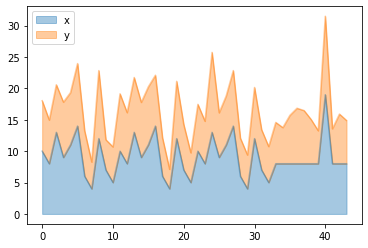

In [81]:
df.plot.area(alpha=0.4)

barplot

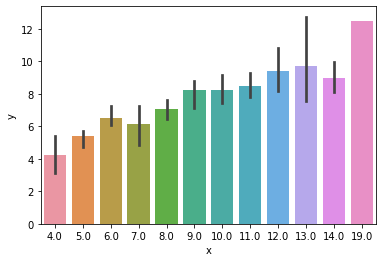

In [82]:
sns.barplot(x='x',y='y',data=df)

Hexbin

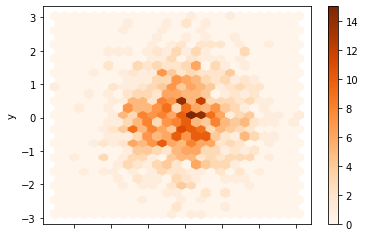

In [83]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['x', 'y'])
df.plot.hexbin(x='x',y='y',gridsize=25,cmap='Oranges')